## Importando o arquivo

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Lendo o arquivo

In [12]:
turbina = pd.read_csv('Turbina_Eolica.csv')
turbina.columns = ['Data/hora', 'PoderAtivação(KW)', 'VelocidadeVento(m/s)', 'CurvaTeórica(KWh)', 'DireçãoVento(°)']
del turbina['DireçãoVento(°)']
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'])
display(turbina)

,Data/hora,PoderAtivação(KW),VelocidadeVento(m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


## Plotando os dados em um gráfico - Real

<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='PoderAtivação(KW)'>

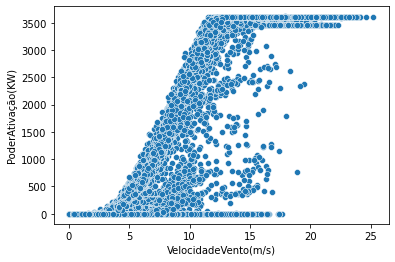

In [13]:
sns.scatterplot(data = turbina, x = 'VelocidadeVento(m/s)', y = 'PoderAtivação(KW)')

## Plotando os dados em um gráfico - Teórica

<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='CurvaTeórica(KWh)'>

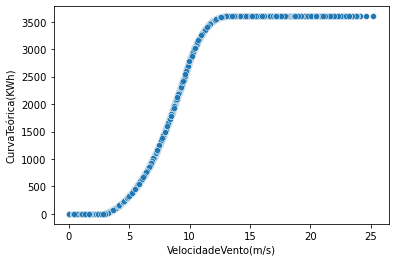

In [14]:
sns.scatterplot(data = turbina, x = 'VelocidadeVento(m/s)', y = 'CurvaTeórica(KWh)')

## Criando " limites acetáveis "

In [24]:
# limite aceitável de 5% para mais e para menos

potencia_real = turbina['PoderAtivação(KW)'].tolist()
potencia_teorica = turbina['CurvaTeórica(KWh)'].tolist()
potencia_max = []
potencia_min = []
dentro_limite = []

# adicionando as potências minima e máxima nas listas vazias para comparar o limite aceitável
for potencia in potencia_teorica:
    potencia_max.append(potencia * 1.05)
    potencia_min.append(potencia * 0.95)
    
for i, potencia in enumerate(potencia_real):
    if potencia >= potencia_min[i] and potencia_max[i]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        
print('A porcentagem que esta dentro do limite aceitável é: ', dentro_limite.count('Dentro')/len(dentro_limite))

A porcentagem que esta dentro do limite aceitável é:  0.2730852958638433


## Adicionando lista " dentro_limite " ao dataframe:

In [25]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,PoderAtivação(KW),VelocidadeVento(m/s),CurvaTeórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Dentro
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Dentro
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


## Plotando novamente o gráfico:

<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='PoderAtivação(KW)'>

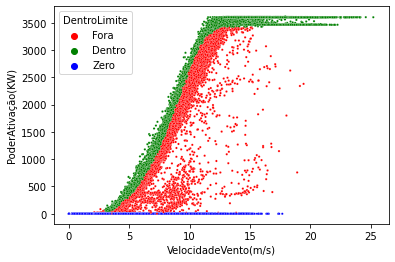

In [32]:
cores = {'Dentro': 'green', 'Fora': 'red', 'Zero': 'blue'}
sns.scatterplot(data = turbina, x = 'VelocidadeVento(m/s)', y = 'PoderAtivação(KW)', hue = 'DentroLimite', s = 5, palette = cores)